In [3]:
import h5py, numpy as np, matplotlib.pyplot as plt

In [4]:
with h5py.File('sigres.h5','r') as ipt:
    sigres = ipt['evtinfo'][:]

In [5]:
with h5py.File('bkgres.h5','r') as ipt:
    bkgres = ipt['evtinfo'][:]

## nMichel=0, qEdep(200,600), eDepR(,17500], E1(20,240),E2(85,430),nCr
### chisquare>3.1, FitTime>35
+ sig: 140 0.0014
+ bkg: 0

In [6]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
jet = plt.cm.jet
newcolors = jet(np.linspace(0, 1, 32768))
white = np.array([1, 1, 1, 0.5])
newcolors[0, :] = white
cmap = ListedColormap(newcolors)

In [7]:
def e1e2(info,xname='E1',yname='E2',nm=0,qel=200,qer=600,eRr=17500,nCr=3,mRr=17000,name='bkg'):
    fig,ax=plt.subplots()
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']<=nCr)&(info['michelDist']<=mRr)
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    ax.set_xlabel(xname)
    ax.set_ylabel(yname)
    fig.colorbar(h[3])
    ax.set_title('nMichel:{} edepR<{} Qedep[{},{}] nCap(,{}] michelR({}] entries:{}'.format(nm,eRr,qel,qer,nCr,mRr,len(info[index])))
    plt.savefig('compare/{}{}{}Nm{}EdepR{}Qedep{}-{}nC-{}mD-{}.png'.format(name,xname,yname,nm,eRr,qel,qer,nCr,mRr))

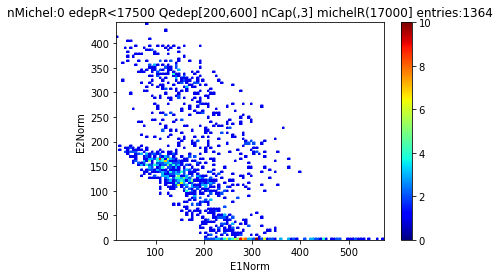

In [6]:
e1e2(sigres,'E1Norm','E2Norm',nm=0,name='sig')

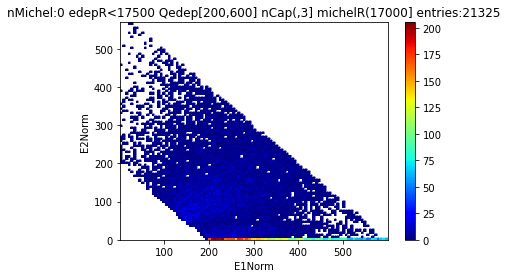

In [7]:
e1e2(bkgres,'E1Norm','E2Norm',nm=0,name='bkg')

In [98]:
def e1e2CHI(info,xname='E1Norm',yname='E2Norm',nm=0,qel=200,qer=600,eRr=17500,nCr=3,mRr=170000,nRr=17500,t12=12.5,chi12=3.5,name='bkg'):#12.5,3.5
    index = (info['Qedep']>qel)&(info['Qedep']<qer)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['edepR']<eRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = (info['nMichel']==nm)&index
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &(info['michelDist']<=mRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &(info['nCap']<=nCr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&(info['nDist']<nRr)
    #print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &(info['chisquare1']>info['chisquare2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index &(((info['E2Norm']>85)&(info['E2Norm']<230))|((info['E2Norm']>=325)&(info['E2Norm']<430)))&(info['E1Norm']<240)&(info['E1Norm']>20)&(info['E1Norm']<240)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    print('finish efficiency summary')
    index = (info['nMichel']==nm)&(info['edepR']<eRr)&(info['Qedep']<qer)&(info['Qedep']>qel)&(info['nCap']<=nCr)&(info['michelDist']<=mRr)&(info['npeak']>1)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90/ns')
    ax.set_ylabel('FitTime/ns')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    index = index&((info['t2']-info['t1'])>t12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    index = index&(((info['E2Norm']>85)&(info['E2Norm']<230))|((info['E2Norm']>=325)&(info['E2Norm']<420)))&(info['E1Norm']<240)&(info['E1Norm']>20)&(info['E1Norm']<240)#&((info['E1Norm']-info['E2Norm'])<40)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&(info['Up90']>=8.5)&(info['Up90']<2*(info['t2']-info['t1']))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['chisquare1']>info['chisquare2']*chi12)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    #index = index&((info['chisquare1']>info['chisquare2']*5)|((info['t2']-info['t1'])>37.5))
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    index = index&(info['nDist']<nRr)
    print(len(info[index]),len(info[info['nMichel']==nm]),len(info[index])/len(info[info['nMichel']==nm]),len(info[index])/len(info))
    
    #print(info[index][['E1Norm','E2Norm']],info[index]['chisquare1']/info[index]['chisquare2'])
    #print(info[index]['eid'])
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index][xname],info[index][yname],bins=[100,100],cmap=cmap)
    fig.colorbar(h[3])
    ax.set_xlabel('E1Norm/MeV')
    ax.set_ylabel('E2Norm/MeV')
    ax.set_title('E1-E2')
    fig,ax=plt.subplots()
    ax.hist(info[index]['Qedep'],bins=100)
    ax.set_title('Qedep distribution')
    ax.set_xlabel('{}/MeV'.format('Qedep'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['t2']-info[index]['t1'],bins=100)
    ax.set_title('FitTime distribution')
    ax.set_xlabel('{}/ns'.format('FitTime'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist(info[index]['chisquare1']/info[index]['chisquare2'],bins=100,range=[0,10])
    ax.set_title('chisquare12 distribution')
    ax.set_xlabel('{}'.format('chisquare'))
    ax.set_ylabel('{}'.format('Entries'))
    fig,ax=plt.subplots()
    ax.hist2d(info[index]['chisquare1']/info[index]['chisquare2'],info[index]['t2']-info[index]['t1'],bins=[100,100])
    ax.set_title('FitTime-chi12')
    ax.set_ylabel('FitTime/ns')
    ax.set_xlabel('chi12')
    fig,ax=plt.subplots()
    h =ax.hist2d(info[index]['Up90'],info[index]['t2']-info[index]['t1'],bins=[100,100],cmap=cmap)
    ax.set_xlabel('up90')
    ax.set_ylabel('FitTime')
    ax.set_title('up90-FitTime')
    fig.colorbar(h[3])
    
    fig,ax=plt.subplots()
    ax.hist(info[index]['nDist'],bins=100)
    ax.set_title('nCapture distribution')
    ax.set_xlabel('{}'.format('nCapture'))
    ax.set_ylabel('{}'.format('Entries'))
# nMichel=0,qEdep(200,600),eDepR(,17500],(chisquare>6.5|FitTime>=35),nCapture<=1,E1(30,200),E2(100,220)(361,430)
# sig: 151 0.0151
# bkg: 0

9472 1623 5.836105976586568 0.9472
9390 1623 5.785582255083179 0.939
1374 1623 0.8465804066543438 0.1374
1374 1623 0.8465804066543438 0.1374
870 1623 0.5360443622920518 0.087
268 1623 0.16512630930375846 0.0268
213 1623 0.13123844731977818 0.0213
144 1623 0.08872458410351201 0.0144
finish efficiency summary
766 1623 0.47196549599507087 0.0766
318 1623 0.19593345656192238 0.0318
208 1623 0.1281577325939618 0.0208
208 1623 0.1281577325939618 0.0208
140 1623 0.0862600123228589 0.014
140 1623 0.0862600123228589 0.014
140 1623 0.0862600123228589 0.014


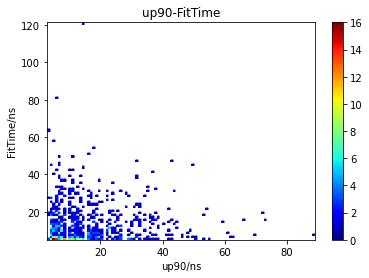

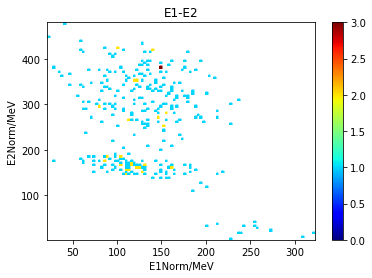

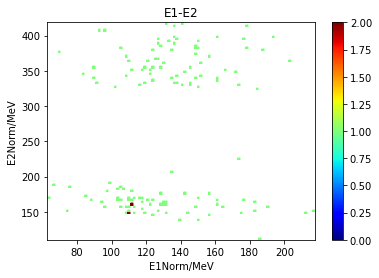

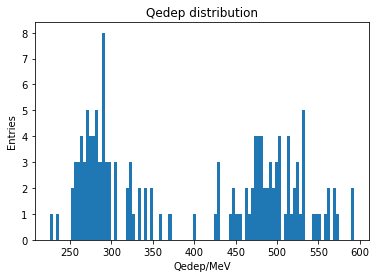

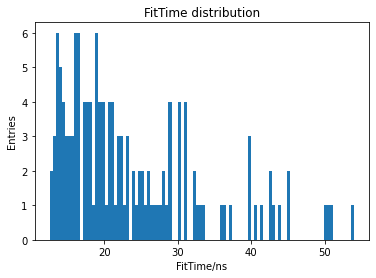

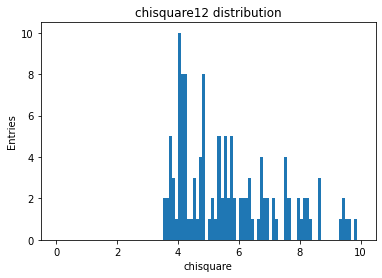

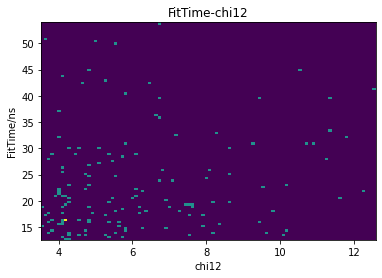

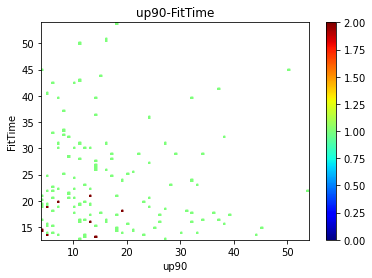

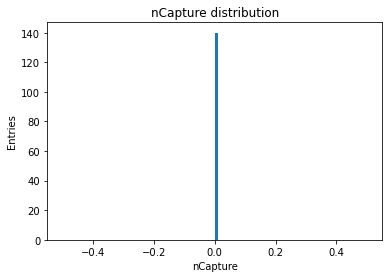

In [99]:
e1e2CHI(sigres,nm=0,nCr=0)

51299 108602 0.4723577834662345 0.32063478173908694
47849 108602 0.44059041269958193 0.299071203560178
25612 108602 0.2358335942247841 0.16008300415020751
25612 108602 0.2358335942247841 0.16008300415020751
8210 108602 0.07559713449107751 0.05131506575328766
23 108602 0.00021178247177768366 0.00014375718785939297
8 108602 7.366346844441171e-05 5.000250012500625e-05
0 108602 0.0 0.0
finish efficiency summary
3527 108602 0.03247638165043001 0.022044852242612132
265 108602 0.002440102392221138 0.001656332816640832
16 108602 0.00014732693688882342 0.0001000050002500125
16 108602 0.00014732693688882342 0.0001000050002500125
0 108602 0.0 0.0
0 108602 0.0 0.0
0 108602 0.0 0.0


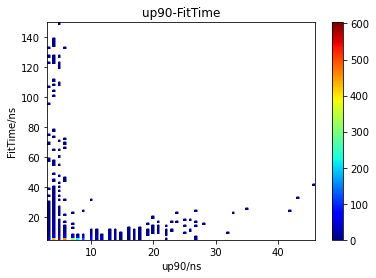

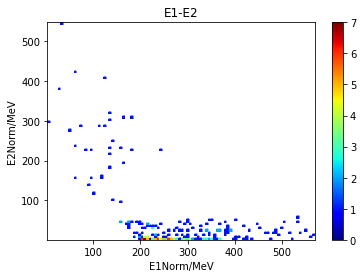

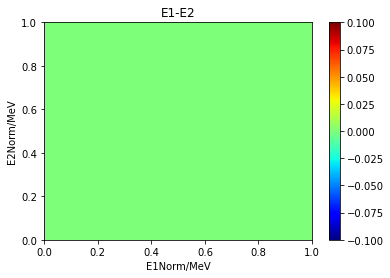

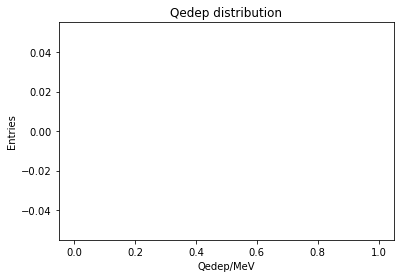

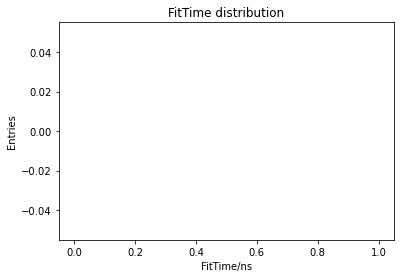

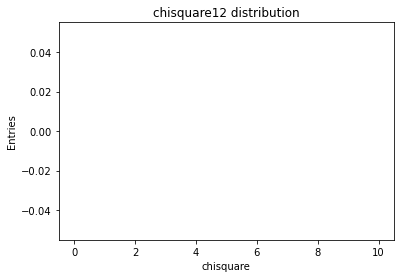

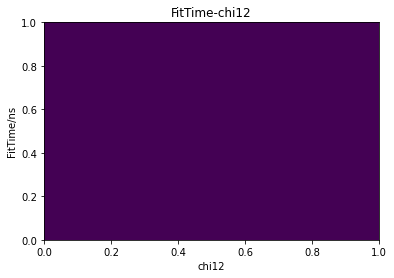

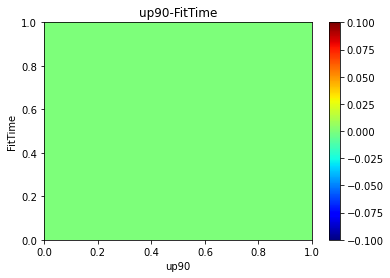

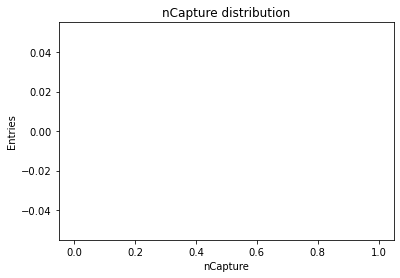

In [100]:
e1e2CHI(bkgres,nm=0,nCr=0)